## Monte Carlo Analysis

In [192]:
using Distributions
using PyCall
using PyPlot
using CurveFit
using Latexify, Symbolics, LaTeXStrings, Formatting
using Polynomials #dont fit, use curvefit for fitting

In [165]:
"""
Representing a Monte Carlo simulation, we know that when the random-binomial (noise) function returns a 1, 
the noise has flipped a bit. For 3-bit encoding, if 0 or 1 bits are flipped then the message will still be 
correctly decoded, else (2 or 3 flipped bits) it has been compromised. 
"""

noise_parameter = 0.1 #coded to be inherently below or equal to 0.5, if higher then bits_changed must be > 2 (using 1-p)

function single_message_decoding()
    #simulating noise
    bits_changed = rand(Binomial(3, noise_parameter), 1)[1] #subjecting all 3 bits to noise and storing the number flipped
    if bits_changed < 2 #if less than two bits have been changed, message is safe
        return 1
    else
        return 0 #else message has been compromised
    end
end

function simulation_process(num_trials=10000)
    results = 0 #number of messages we successfully decode for a set noise parameter
    for _ in range(0,num_trials)
        results += single_message_decoding() #as single_message only returns 1 or 0
    end
    return results/num_trials #probability of successful decoding for set n_p with num_trials
end
;
    

In [24]:
# Monte Carlo process
y = []
x = range(0,0.5,1000) #running our Monte Carlo process over the range of 0-0.5 probability of bit flip
for i in x
    noise_parameter = i
    push!(y, simulation_process()) #creating x and y arrays for plotting purposes
end

In [ ]:
# building a curve fit (important to make x,y same type)
fit = curve_fit(Polynomial, collect(x), convert(Array{Float64}, y), 3)
y_fit = fit.(x)

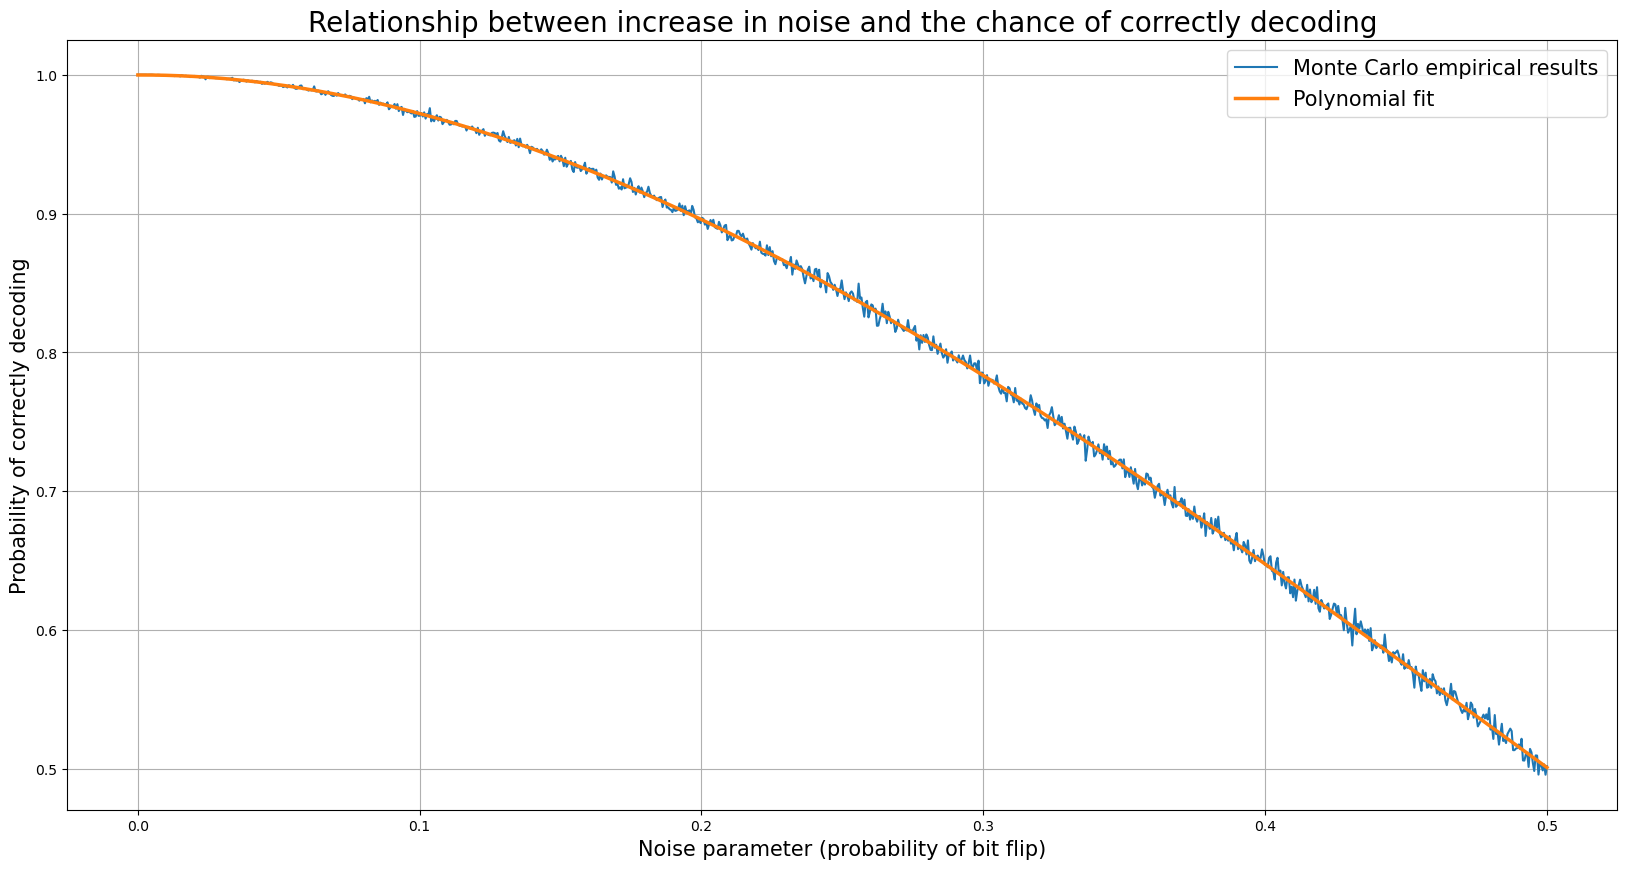

In [182]:
#plotting
figure(figsize=(20,10))
plot(x,y, label="Monte Carlo empirical results");


plot(x, y_fit, label="Polynomial fit", linewidth=2.5)
title("Relationship between increase in noise and the chance of correctly decoding", fontsize=20)
xlabel("Noise parameter (probability of bit flip)", fontsize=15)
ylabel("Probability of correctly decoding", fontsize=15)
grid()
legend(fontsize=15);

Thus we find that our derived equation for the chance of transmitting the correct message, P(correct) as a function of the noise on the channel holds the equation seen below:

In [161]:
latexify("$fit")

L"$0.999914 + 0.00708944 \cdot x - 3.05898 \cdot x^{2} + 2.09826 \cdot x^{3}$"

After approximating the first order term to 0 and rounding values, we find the equation to be:

In [188]:
rounded_polynomial = map(x -> round(x, digits=0), Polynomial([fit[0], 0.0, fit[2], fit[3]]))
latexify("$rounded_polynomial", fmt=x->format(round(x, sigdigits=1)))

L"$1 - 3 \cdot x^{2} + 2 \cdot x^{3}$"

Which matches perfectly with theoretical expectations. We can see in the plot below that this improved chance of sending correct messages is only applicable between an error probability of 0 and 0.5 (the latter at which it falls to perfectly match _p_, our error rate). Any higher than 0.5 and 1-p should be used as the error probability to yield the same results (or in other words if the target bit is 1, the 0's should be counted instead).

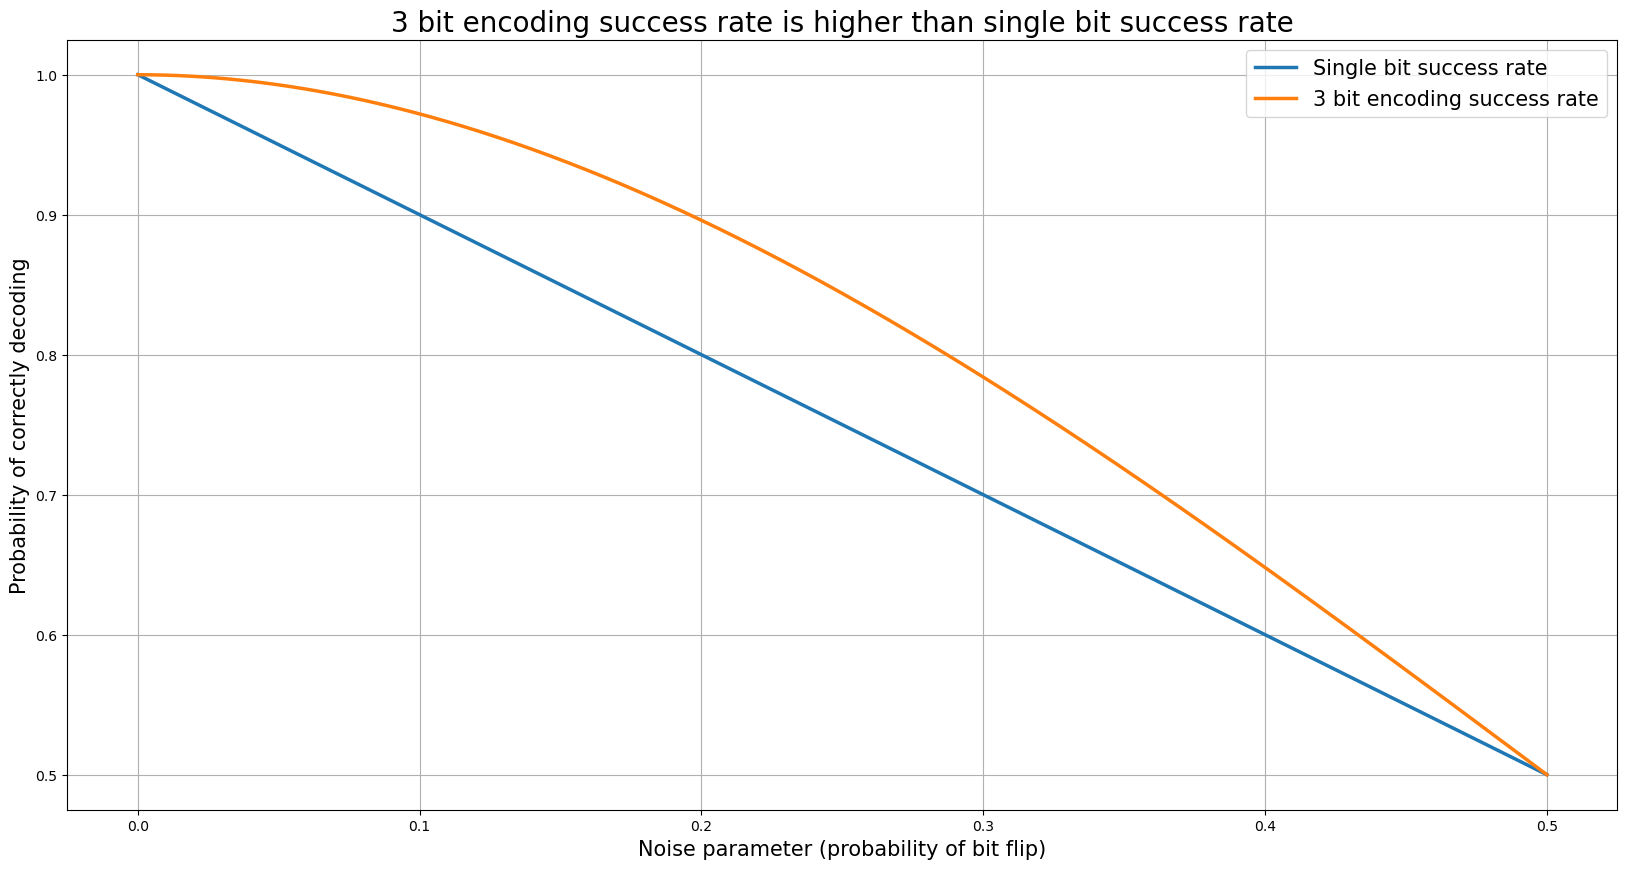

In [189]:
figure(figsize=(20,10))
plot(x, Polynomial([1, -1]).(x), label="Single bit success rate", linewidth=2.5)
plot(x, rounded_polynomial.(x), label="3 bit encoding success rate", linewidth=2.5)

title("3 bit encoding success rate is higher than single bit success rate", fontsize=20)
xlabel("Noise parameter (probability of bit flip)", fontsize=15)
ylabel("Probability of correctly decoding", fontsize=15)
grid()
legend(fontsize=15);

## First order derivative of the fitted chance polynomial

The first order derivative is:

L"$-6.0 \cdot x + 6.0 \cdot x^{2}$"

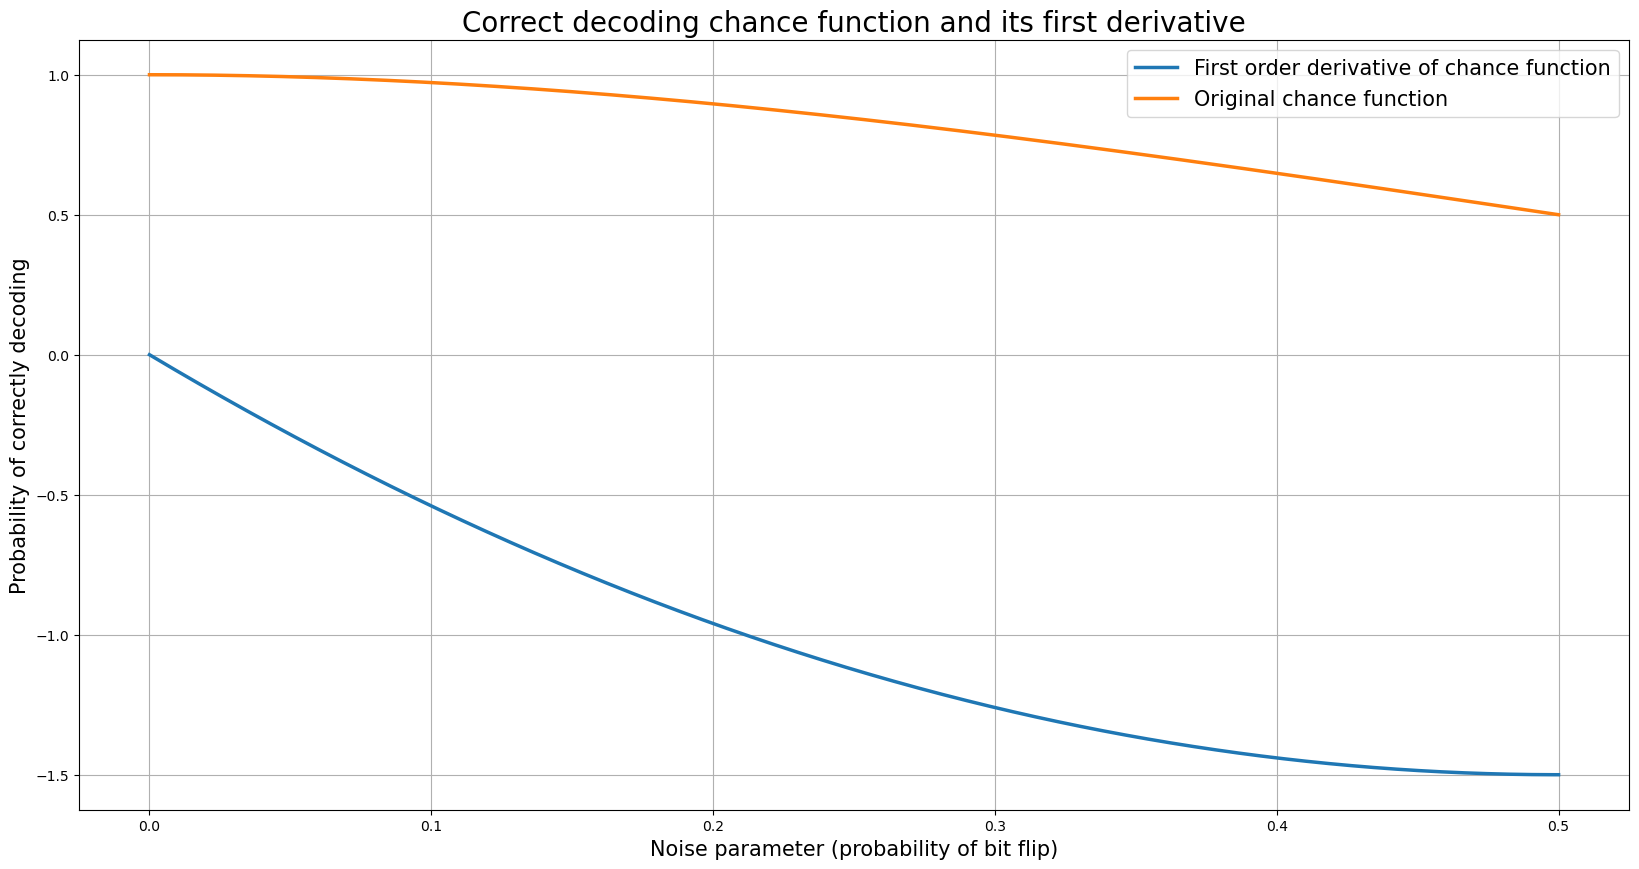

In [200]:
#creating a plot of the function derived above and plotting its first derivative along with it
first_order = derivative(rounded_polynomial)
print("The first order derivative is:")
display(latexify("$first_order"))

figure(figsize=(20,10))
plot(x, first_order.(x), label="First order derivative of chance function", linewidth=2.5)
plot(x, rounded_polynomial.(x), label="Original chance function", linewidth=2.5)

title("Correct decoding chance function and its first derivative", fontsize=20)
xlabel("Noise parameter (probability of bit flip)", fontsize=15)
ylabel("Probability of correctly decoding", fontsize=15)
grid()
legend(fontsize=15);